## A Pipeline for Transcriptomic Data Using Seurat 
### Sample F8_37 - Human Reference

In [2]:
# library(Seurat)

In [3]:
# if (FALSE) {
# # For output from CellRanger < 3.0
# data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
# list.files(data_dir) # Should show barcodes.tsv, genes.tsv, and matrix.mtx
# expression_matrix <- Read10X(data.dir = data_dir)
# seurat_object = CreateSeuratObject(counts = expression_matrix)

# # For output from CellRanger >= 3.0 with multiple data types
# data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
# list.files(data_dir) # Should show barcodes.tsv.gz, features.tsv.gz, and matrix.mtx.gz
# data <- Read10X(data.dir = data_dir)
# seurat_object = CreateSeuratObject(counts = data$`Gene Expression`)
# seurat_object[['Protein']] = CreateAssayObject(counts = data$`Antibody Capture`)
# }

### 1. Read data to a Seurat object 

Note to self: this creation of the Seurat Object can be parallelized over different samples.

In [69]:
library(dplyr)
library(Seurat)
library(patchwork)

# Load the PBMC dataset -> F837
pbmcf837.data <- Read10X(data.dir = "../new_outs/F8_37_human_outs/F8_37_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmcf837 <- CreateSeuratObject(counts = pbmcf837.data, project = "f837", min.cells = 3, min.features = 200)


# Load the PBMC dataset -> F838
pbmcf838.data <- Read10X(data.dir = "../new_outs/F8_38_human_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmcf838 <- CreateSeuratObject(counts = pbmcf838.data, project = "f838", min.cells = 3, min.features = 200)
pbmcf838

# Load the PBMC dataset -> V1_3
pbmcv13.data <- Read10X(data.dir = "../new_outs/V1_3_human_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmcv13 <- CreateSeuratObject(counts = pbmcv13.data, project = "v13", min.cells = 3, min.features = 200)
pbmcv13

# Load the PBMC dataset -> V1_62
pbmcv162.data <- Read10X(data.dir = "../new_outs/V1_62_human_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmcv162 <- CreateSeuratObject(counts = pbmcv162.data, project = "v162", min.cells = 3, min.features = 200)
pbmcv162

An object of class Seurat 
19595 features across 3514 samples within 1 assay 
Active assay: RNA (19595 features, 0 variable features)

An object of class Seurat 
19856 features across 1924 samples within 1 assay 
Active assay: RNA (19856 features, 0 variable features)

An object of class Seurat 
18953 features across 1292 samples within 1 assay 
Active assay: RNA (18953 features, 0 variable features)

In [70]:
#rownames(x = pbmc)

### Standard pre-processing workflow

In [71]:
# pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [72]:
# # Visualize QC metrics as a violin plot
# VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [73]:
# plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
# plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
# plot1 + plot2

### 2. Normalizing the data

This might take a few minutes without a GPU.

In [74]:
#Old Log Normalization Pipeline:
#pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

#New sctransform Pipeline:
library(sctransform)
pbmcf837_normalized <- SCTransform(object = pbmcf837)
pbmcf838_normalized <- SCTransform(object = pbmcf838)
pbmcfv13_normalized <- SCTransform(object = pbmcv13)
pbmcfv162_normalized <- SCTransform(object = pbmcv162)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19187 by 3523

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3523 cells



  |======================================================================| 100%


Found 65 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19187 genes



  |======================================================================| 100%


Computing corrected count matrix for 19187 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.342938 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18472 by 3514

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3514 cells



  |======================================================================| 100%


Found 44 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18472 genes



  |======================================================================| 100%


Computing corrected count matrix for 18472 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.336736 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18645 by 1924

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1924 cells



  |======================================================================| 100%


Found 54 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18645 genes



  |======================================================================| 100%


Computing corrected count matrix for 18645 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 46.18631 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 17849 by 1292

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1292 cells



  |======================================================================| 100%


Found 64 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 17849 genes



  |======================================================================| 100%


Computing corrected count matrix for 17849 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 40.03785 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



## 2a. Plotting Distributions of Biomarker Gene Counts:

In [75]:
library(ggplot2)

In [76]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

### 2ai. F837 Distributions:

Picking joint bandwidth of 0.262

Picking joint bandwidth of 1.57

Picking joint bandwidth of 0.787

Picking joint bandwidth of 17.7

Picking joint bandwidth of 0.131

Picking joint bandwidth of 0.345



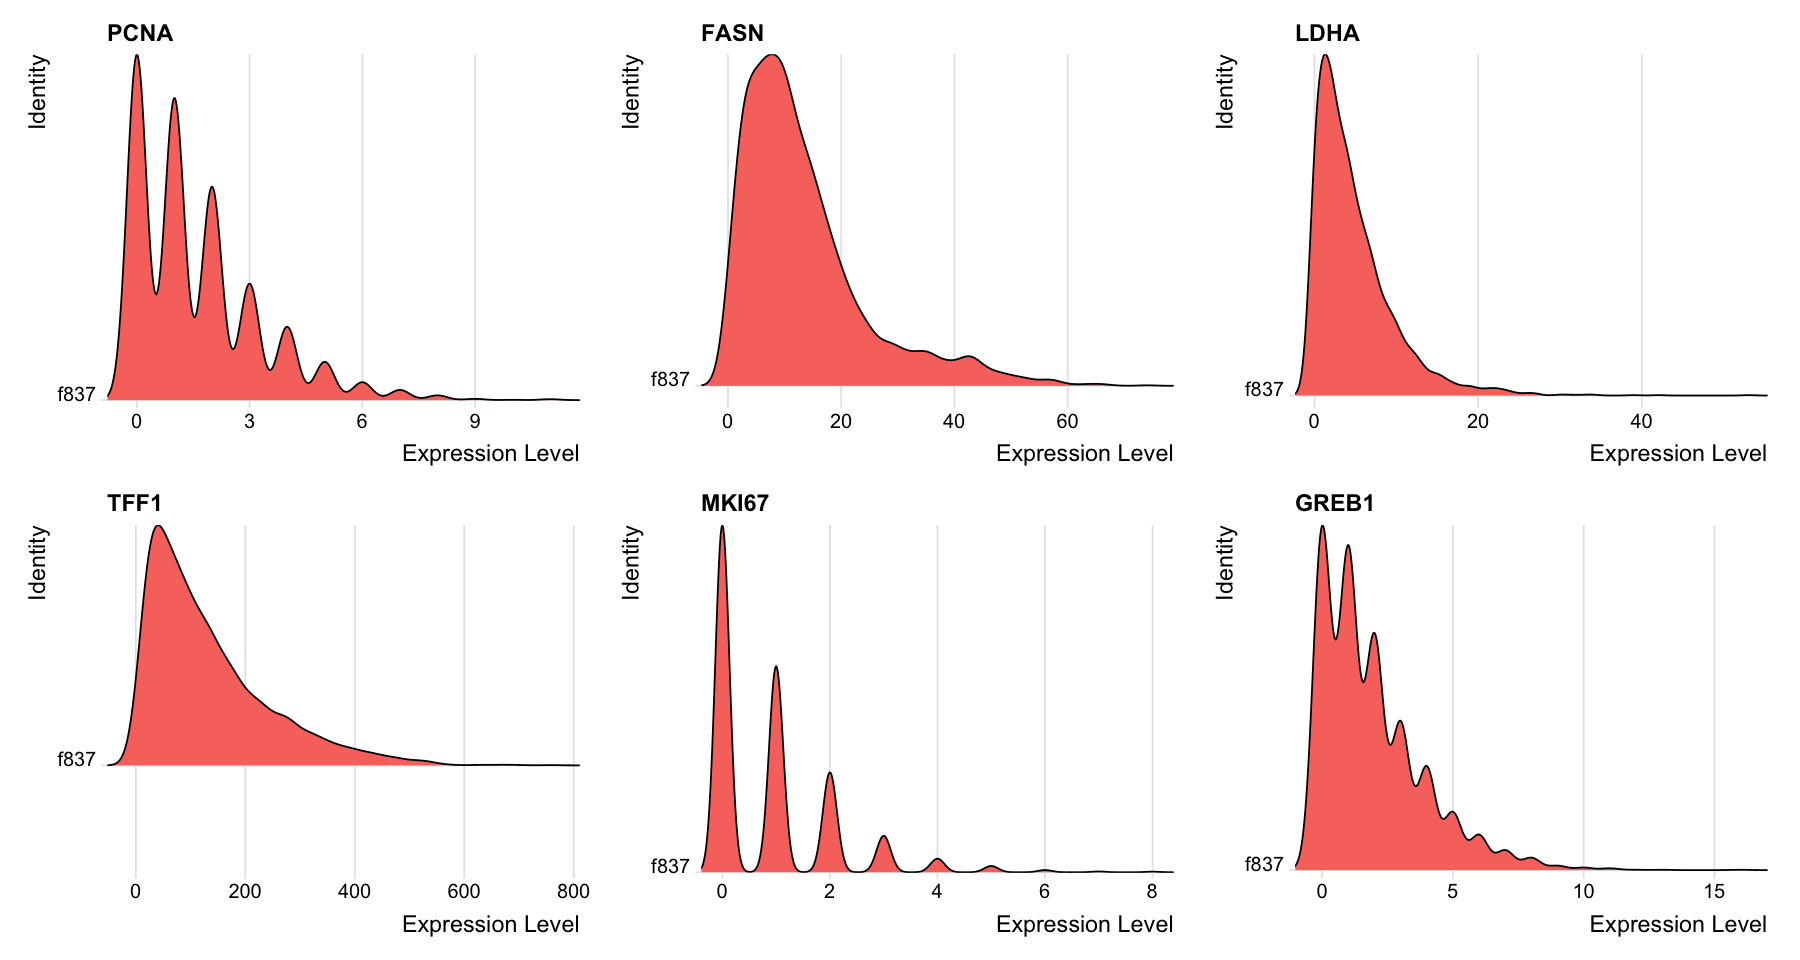

In [77]:
features <- c("PCNA", "FASN", "LDHA","TFF1", "MKI67", "GREB1")

RidgePlot(object=pbmcf837, features, combine=TRUE)

In [78]:
#VlnPlot(pbmcf837, features, combine=TRUE)

### 2aii. F838 Distributions:

Picking joint bandwidth of 0.245

Picking joint bandwidth of 1.16

Picking joint bandwidth of 0.656

Picking joint bandwidth of 13.5

Picking joint bandwidth of 0.131

Picking joint bandwidth of 0.131



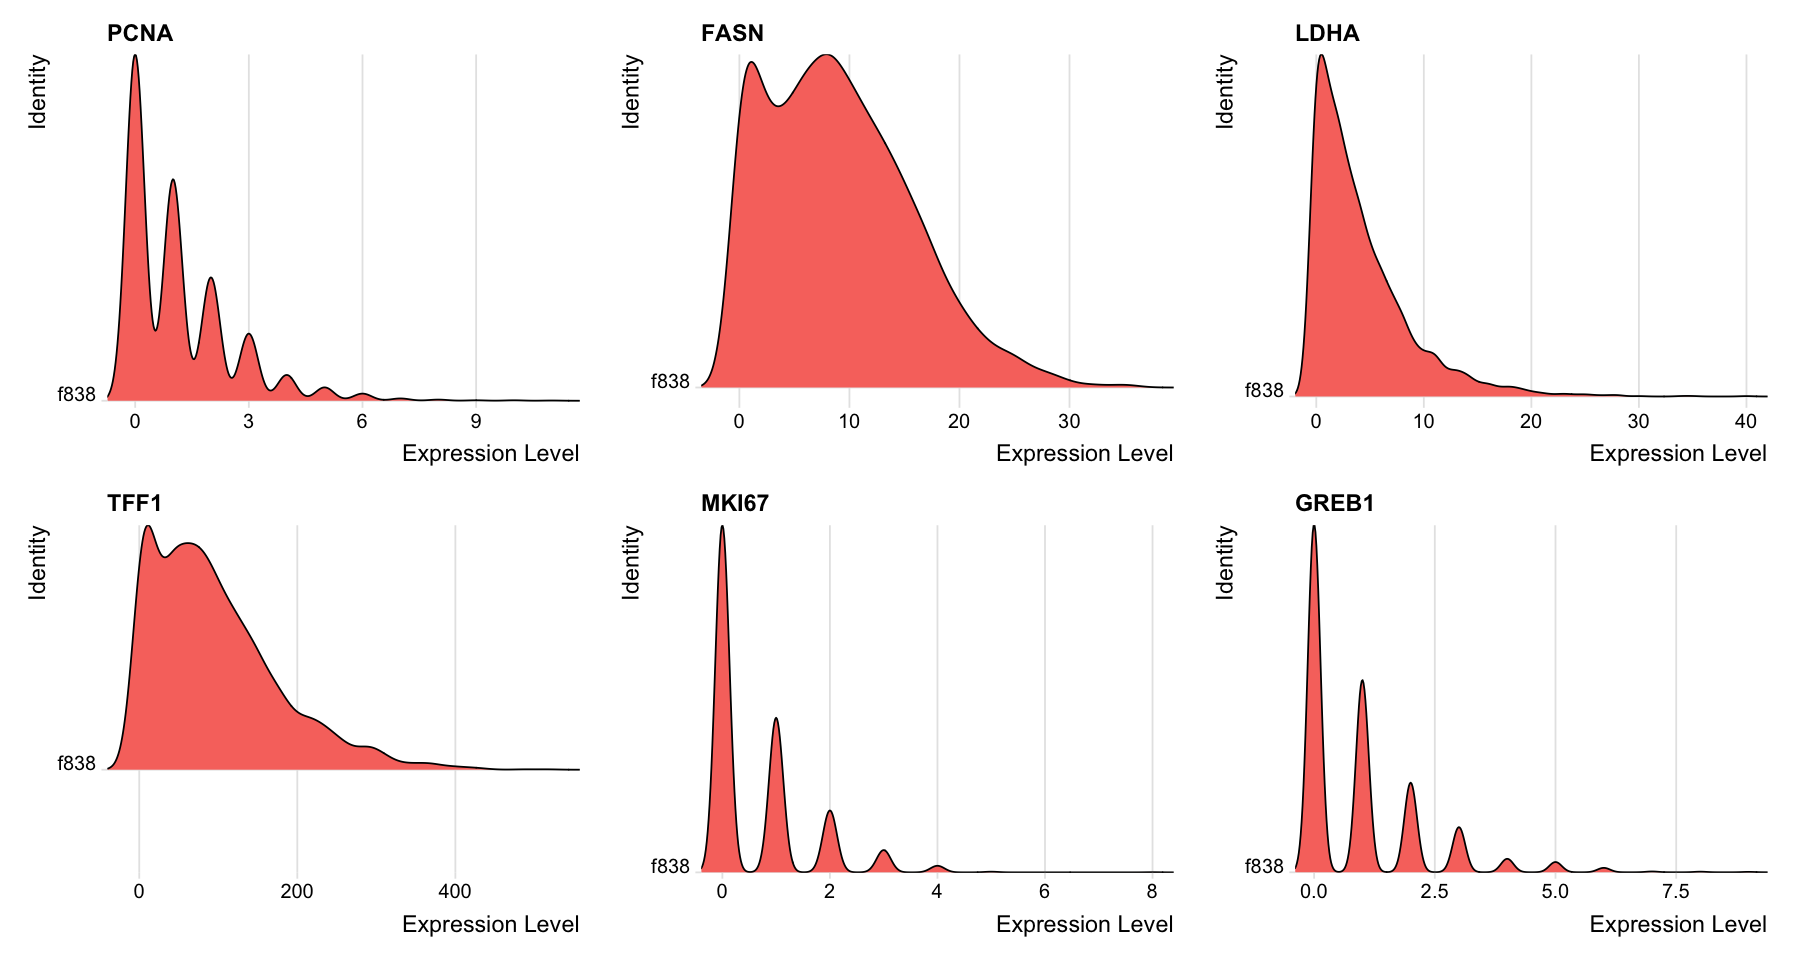

In [79]:
RidgePlot(object=pbmcf838, features, combine=TRUE)

In [80]:
#VlnPlot(object=pbmcf838, features, combine=TRUE)

### 2aiii. V1_3 Distributions:

Picking joint bandwidth of 0.592

Picking joint bandwidth of 1.42

Picking joint bandwidth of 2.37

Picking joint bandwidth of 27.8

Picking joint bandwidth of 0.434

Picking joint bandwidth of 1.33



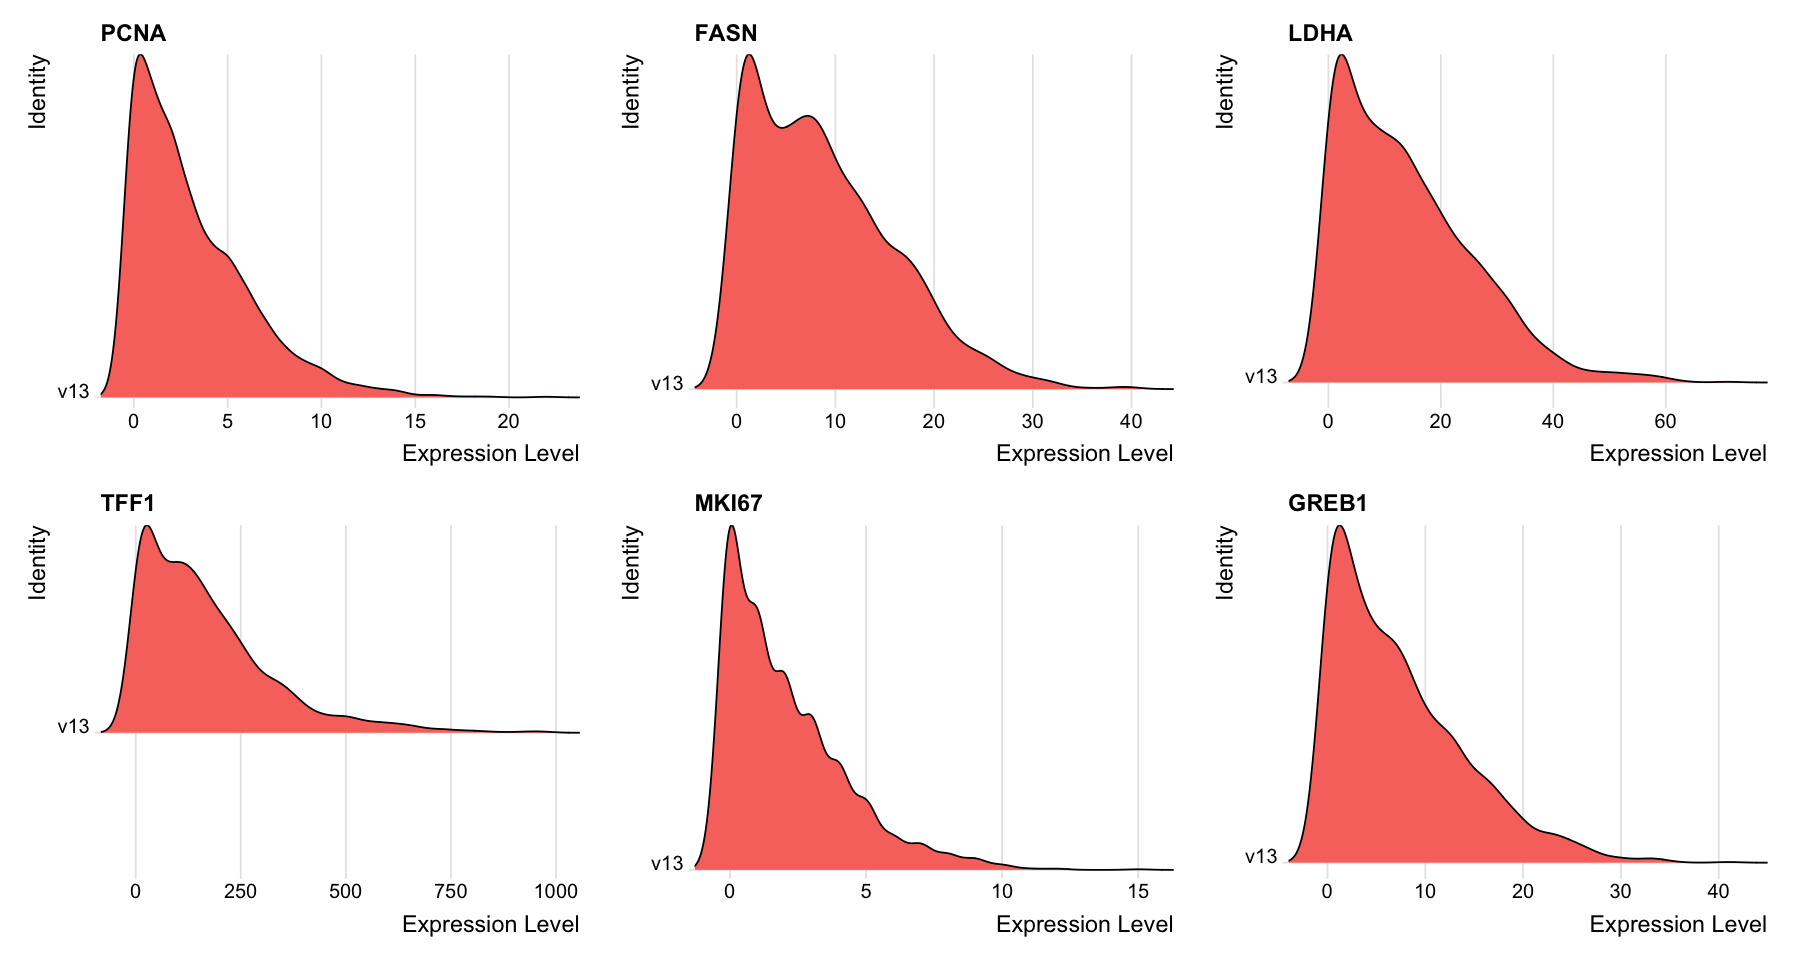

In [81]:
RidgePlot(object=pbmcv13, features, combine=TRUE)

In [82]:
#VlnPlot(object=pbmcv13, features, combine=TRUE)

### 2aiv. V1_62 Distributions:

Picking joint bandwidth of 0.637

Picking joint bandwidth of 1.69

Picking joint bandwidth of 2.56

Picking joint bandwidth of 32.7

Picking joint bandwidth of 0.481

Picking joint bandwidth of 1.55



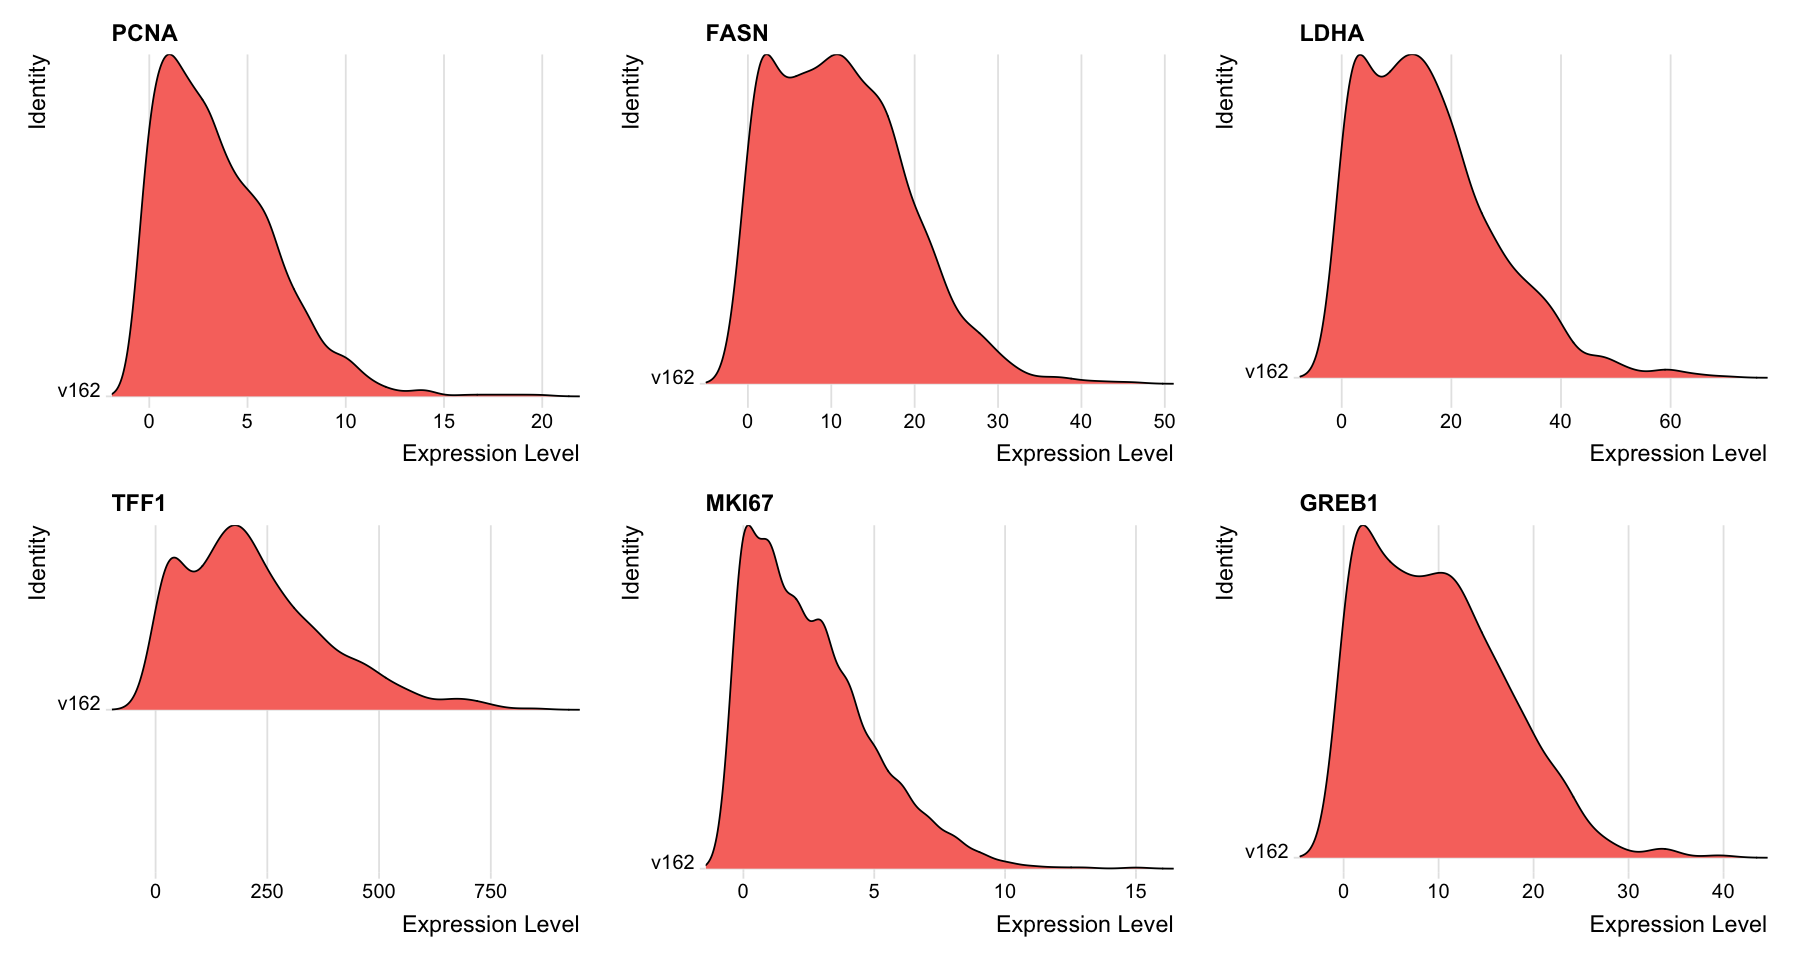

In [83]:
RidgePlot(object=pbmcv162, features, combine=TRUE)

In [84]:
#VlnPlot(object=pbmcv162, features, combine=TRUE)

### 2av. Merged Analysis:

In [85]:
pbmc.merged <- merge(pbmcf837, y = c(pbmcf838, pbmcv13, pbmcv162), add.cell.ids = c("f837", "f838", "v13", "v162"), project = "aggregated")
pbmc.merged

An object of class Seurat 
21499 features across 10253 samples within 1 assay 
Active assay: RNA (21499 features, 0 variable features)

In [86]:
table(pbmc.merged$orig.ident)


f837 f838  v13 v162 
3523 3514 1924 1292 

Picking joint bandwidth of 0.434

Picking joint bandwidth of 1.46

Picking joint bandwidth of 1.59

Picking joint bandwidth of 22.9

Picking joint bandwidth of 0.294

Picking joint bandwidth of 0.839



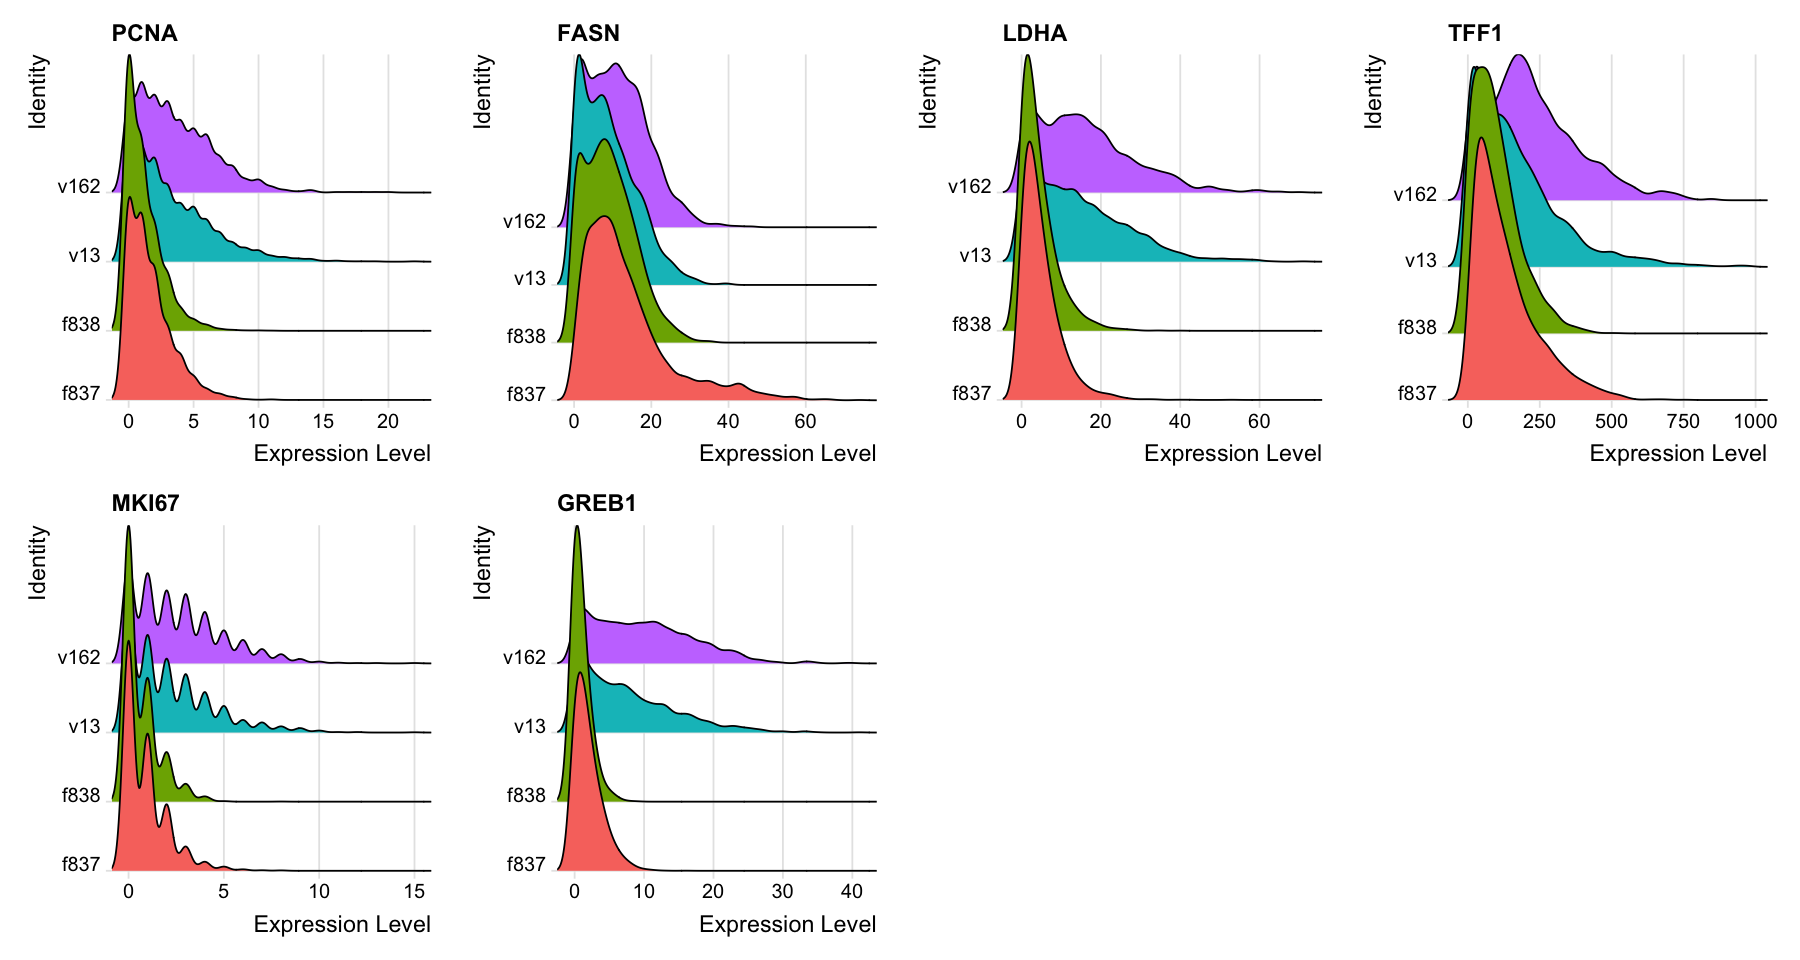

In [89]:
RidgePlot(pbmc.merged, features=features, ncol=4, group.by="orig.ident")

My attempt at using KL-Divergence (probably better to do this in Python):

In [19]:
FASN37_vec = FetchData(object=pbmcf837, vars=c("FASN"))[["FASN"]]
FASN38_vec = FetchData(object=pbmcf838, vars=c("FASN"))[["FASN"]]

In [20]:
library(clustifyr)

In [23]:
kl_divergence(FASN38_vec, FASN37_vec, if_log = FALSE, total_reads = 1000, max_KL = 1)

ERROR: Error in kl_divergence(FASN38_vec, FASN37_vec, if_log = FALSE, total_reads = 1000, : could not find function "kl_divergence"


### 3. Identification of highly variable features (recommended Top 2000) 

Notice that with the switch to sctransform, much of the additional functions such as FindVariableFeatures and NormalizeData are redundant.

In [3]:
#pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=15, repr.plot.height=10)
plot1 + plot2

ERROR: Error: Please run either 'FindVariableFeatures' or 'SCTransform'


### 4. Scalind data center around zeros for all genes

In [41]:
# all.genes <- rownames(pbmc)
# pbmc <- ScaleData(pbmc, features = all.genes)

### 5. Dimensionality reduction using PCA for all genes

In [42]:
# pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

### 6. Scalind data center around zeros for top 2000 features

Thanks to sctransform, ScaleData is not necessary.

In [43]:
#pbmc <- ScaleData(pbmc)

### 7. Dimensionality Reduction using PCA for top 2000 features

In [44]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  F2, FGB, FN1, HPR, TTC36, RPS20, ZNF90, ALB, CYP2D6, ERRFI1 
	   ID2, NRN1, FGL1, H2AW, LRP1, ACSL1, ATP5MC3, IGF1, RPL27A, SEMA4G 
	   EEF1A1, SOD1, KLF15, FABP1, ATP5MC1, UBA52, ATP11C, EIF1, TUBA4A, PLPP3 
Negative:  TFF3, CFAP276, RPS15A, RSPH1, CCNO, MLPH, SNTN, DNAAF1, CST3, PIFO 
	   CFAP157, CAPSL, RPL12, FAM183A, RPL4, CCDC78, SERHL2, PPP1R32, LRRC75A, NEAT1 
	   TPPP3, RPS3, CSTA, TRIR, VMP1, CDC20B, SNHG7, MUC12, MALAT1, RPL29 
PC_ 2 
Positive:  TFF3, CFAP276, RSPH1, CCNO, SNTN, DNAAF1, PIFO, TPPP3, CAPSL, CFAP157 
	   FAM183A, TUBB4B, PPP1R32, MUC12, PSENEN, CCDC78, CDC20B, FOXJ1, HES6, CFAP141 
	   CIBAR2, LRRC23, DYNLRB2, CFAP73, ROPN1L, LRRC46, ENSG00000258752, TEKT1, LRRC74B, CAPS 
Negative:  MT-CO3, MT-CO1, MT-CO2, MT-ND3, MT-ATP6, MT-ND4, MT-ND1, MT-ND2, MT-CYB, TFF1 
	   APOD, CCDC47, CRABP2, SCD, HSPB1, RPLP1, DSCAM-AS1, GFRA1, TBC1D9, EIF4EBP1 
	   TPT1, MT-ND5, RPL41, CD24, GPER1, S100P, COX6C, RPL23A, KRT8, SLC7A2 
PC_ 3 
Positive:  RPL17, LRRC7

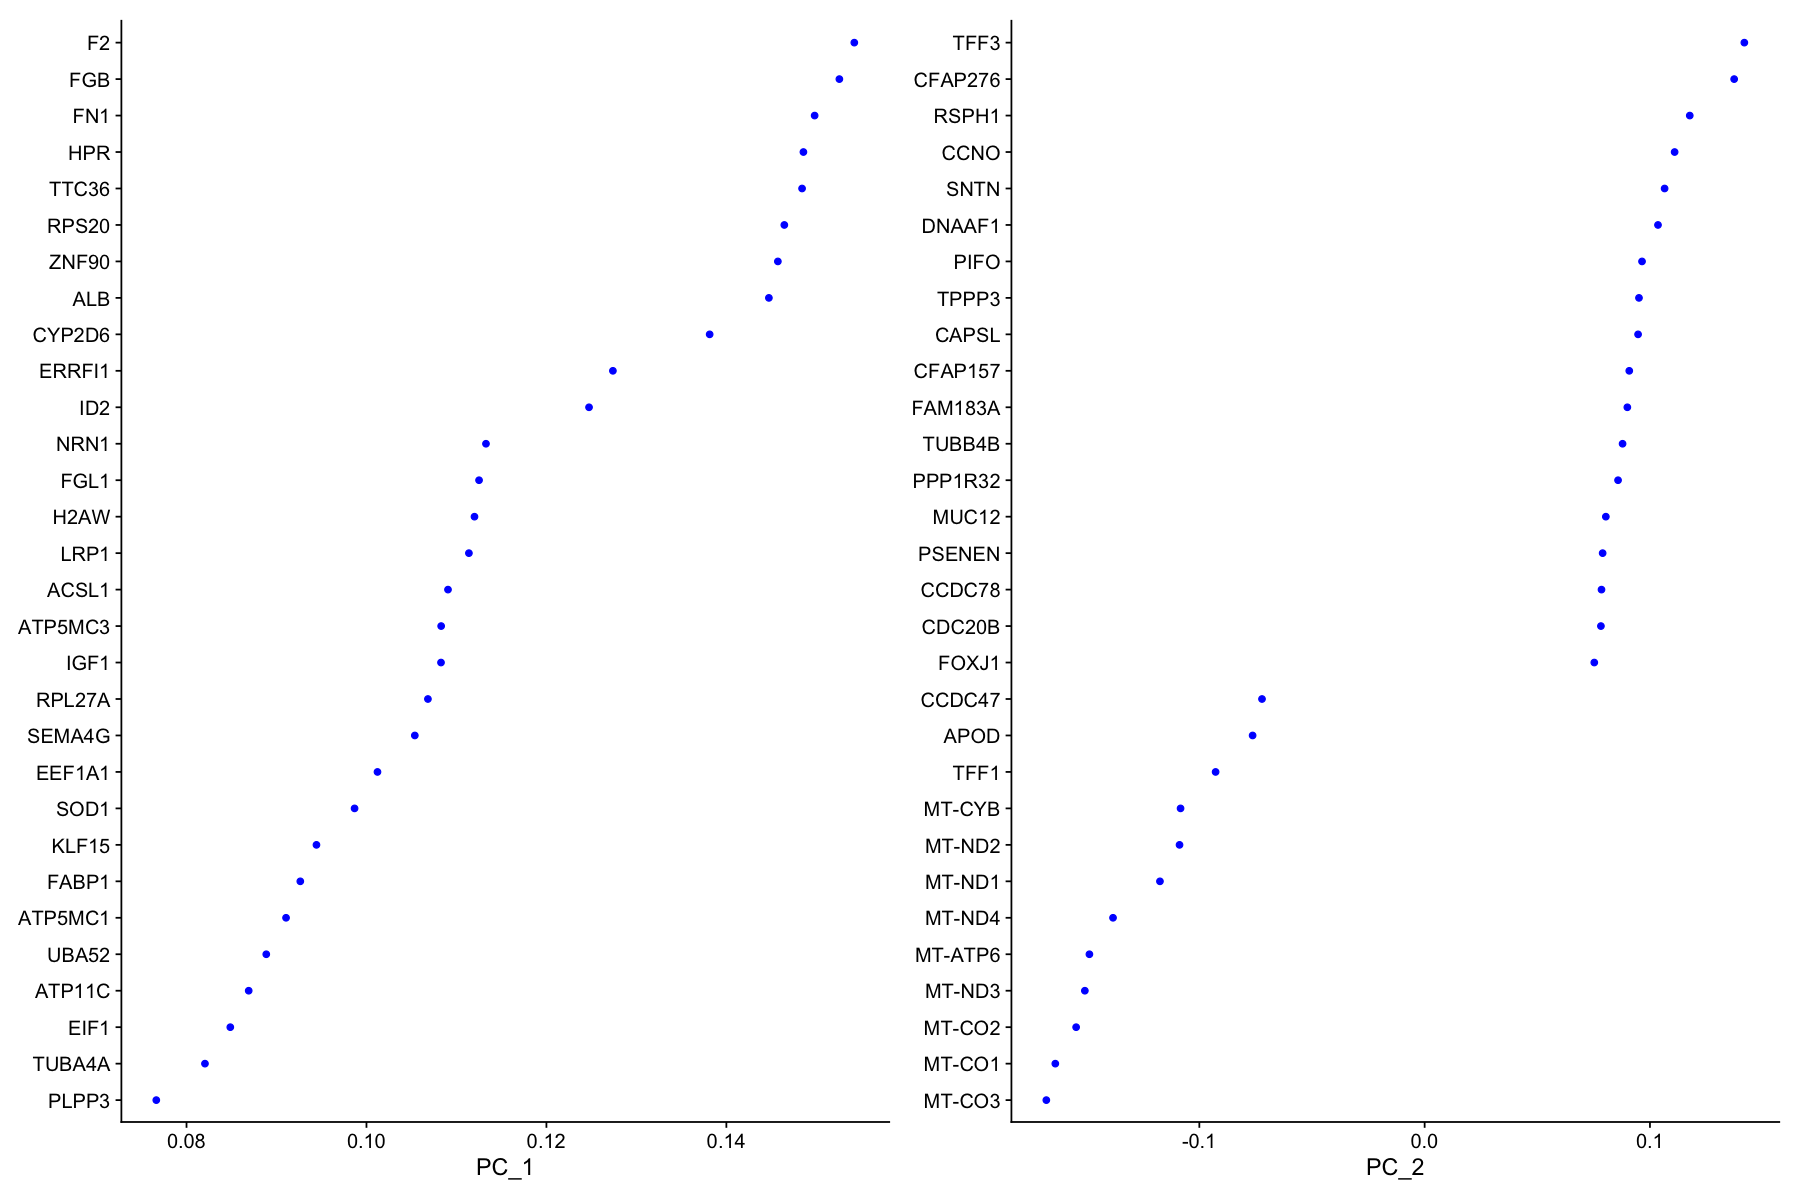

In [45]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

### Elbow Graph for selecting the optimum number of PCs

The graph stabilizes after PC6. The first five PCs are sufficient to capture the variations.  

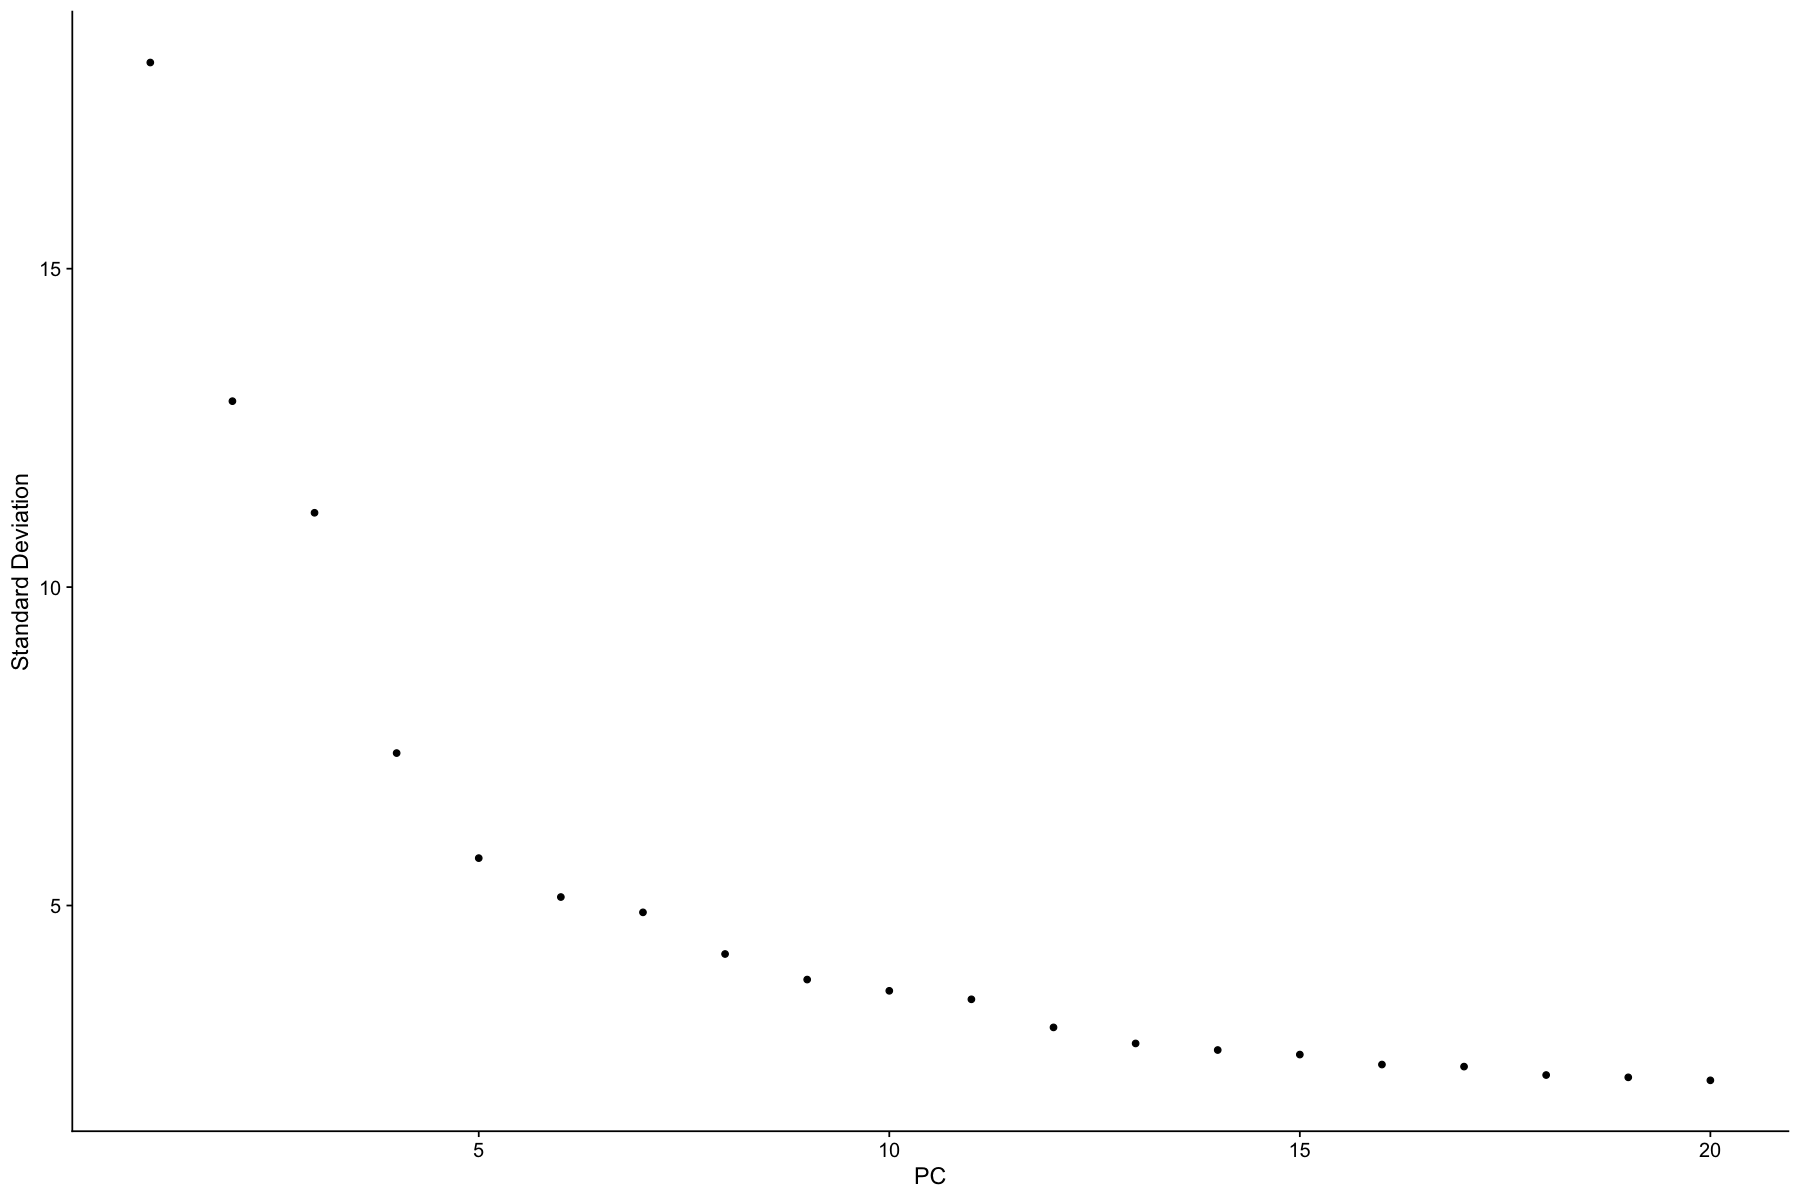

In [46]:
ElbowPlot(pbmc)

### Heat Maps for PC

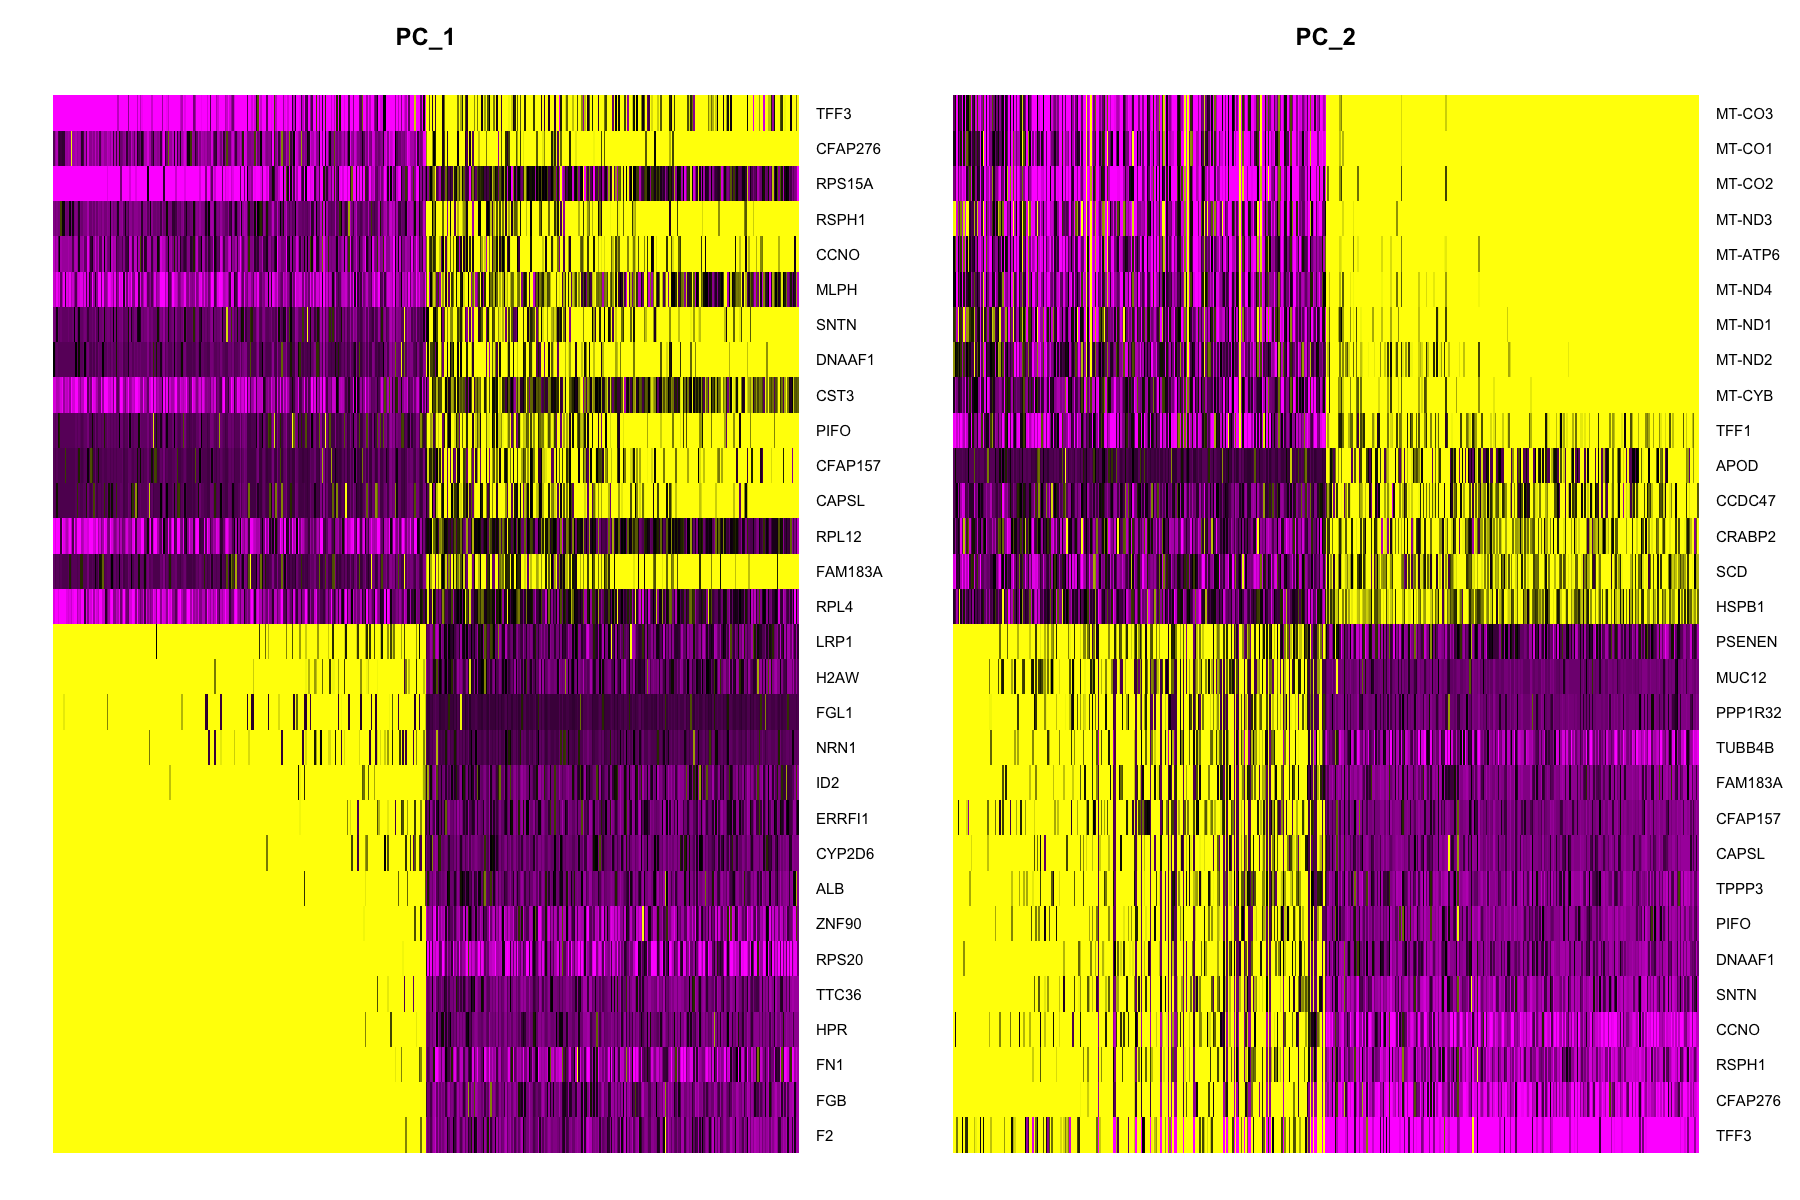

In [47]:
DimHeatmap(pbmc, dims = 1:2, cells = 500, balanced = TRUE)

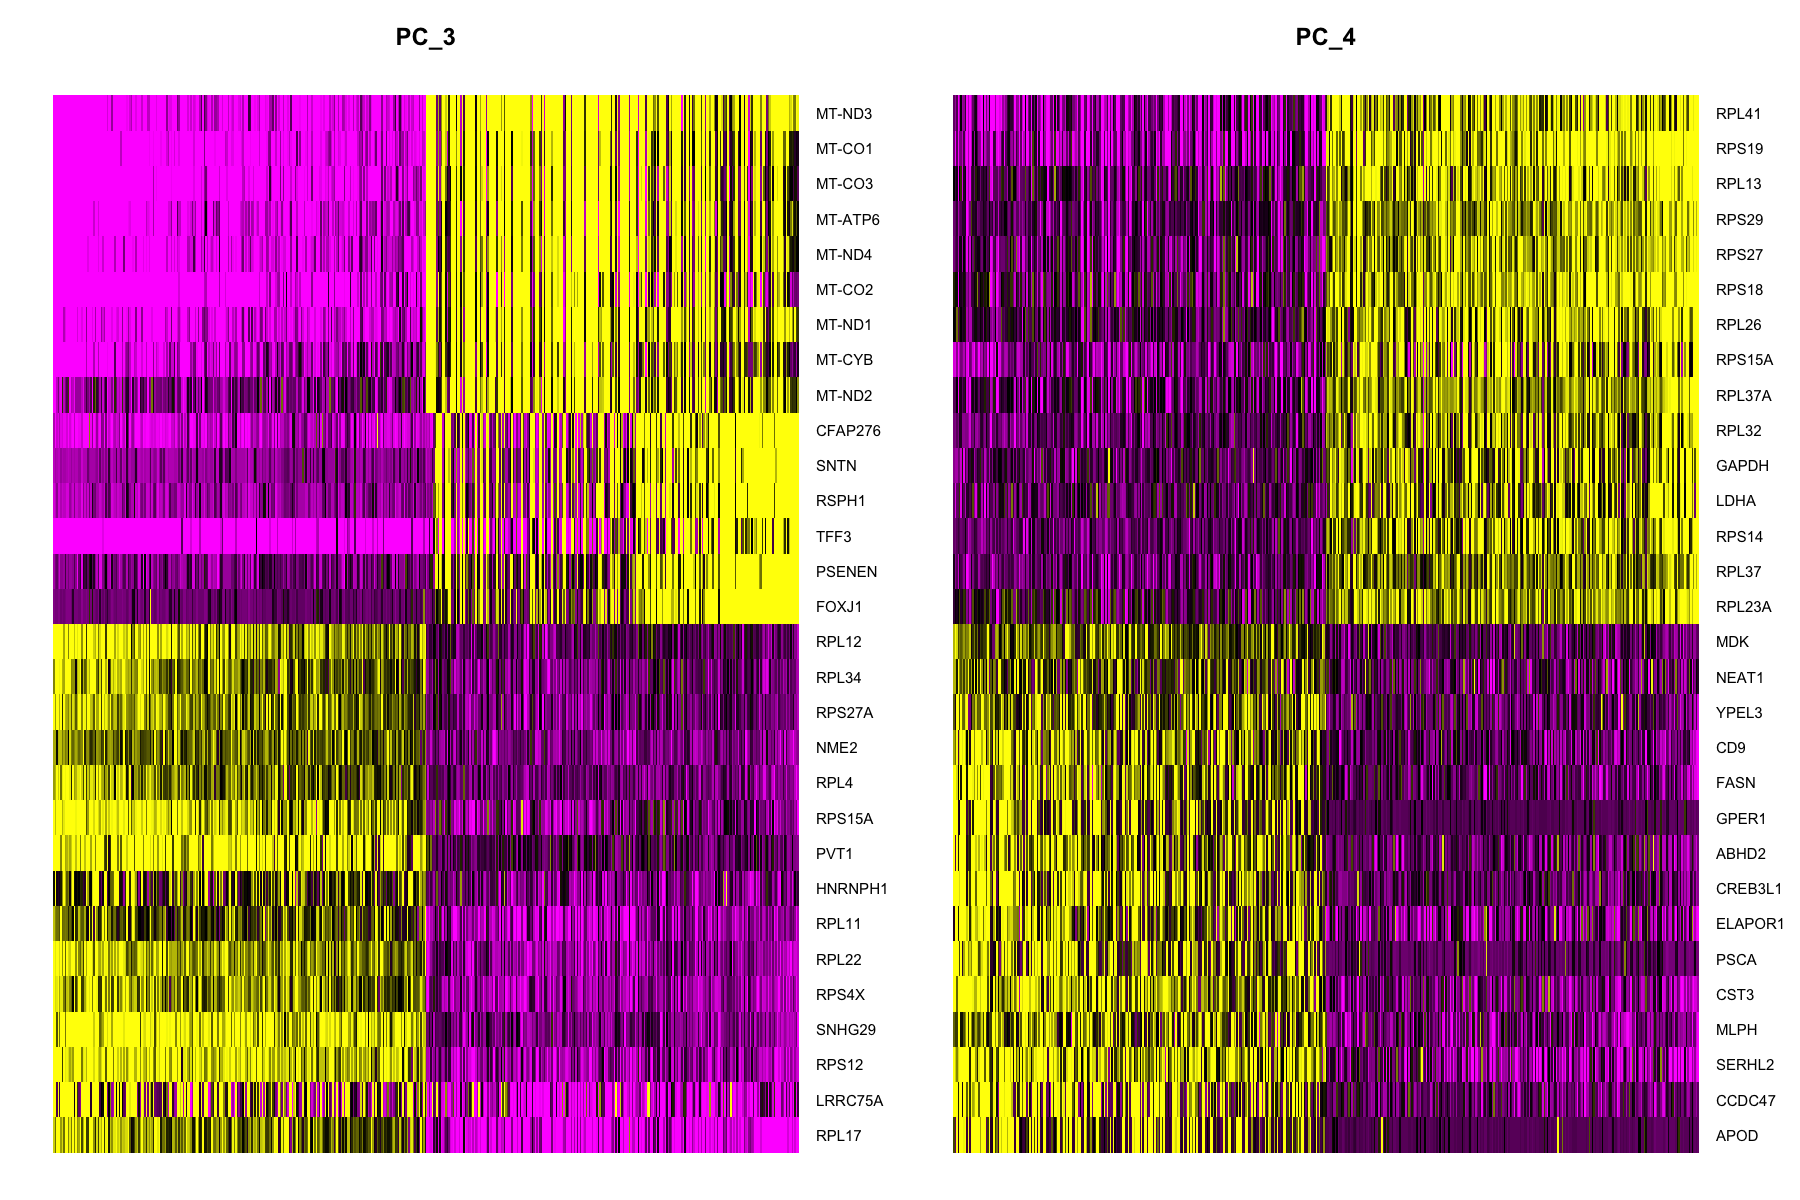

In [48]:
DimHeatmap(pbmc, dims = 3:4, cells = 500, balanced = TRUE)

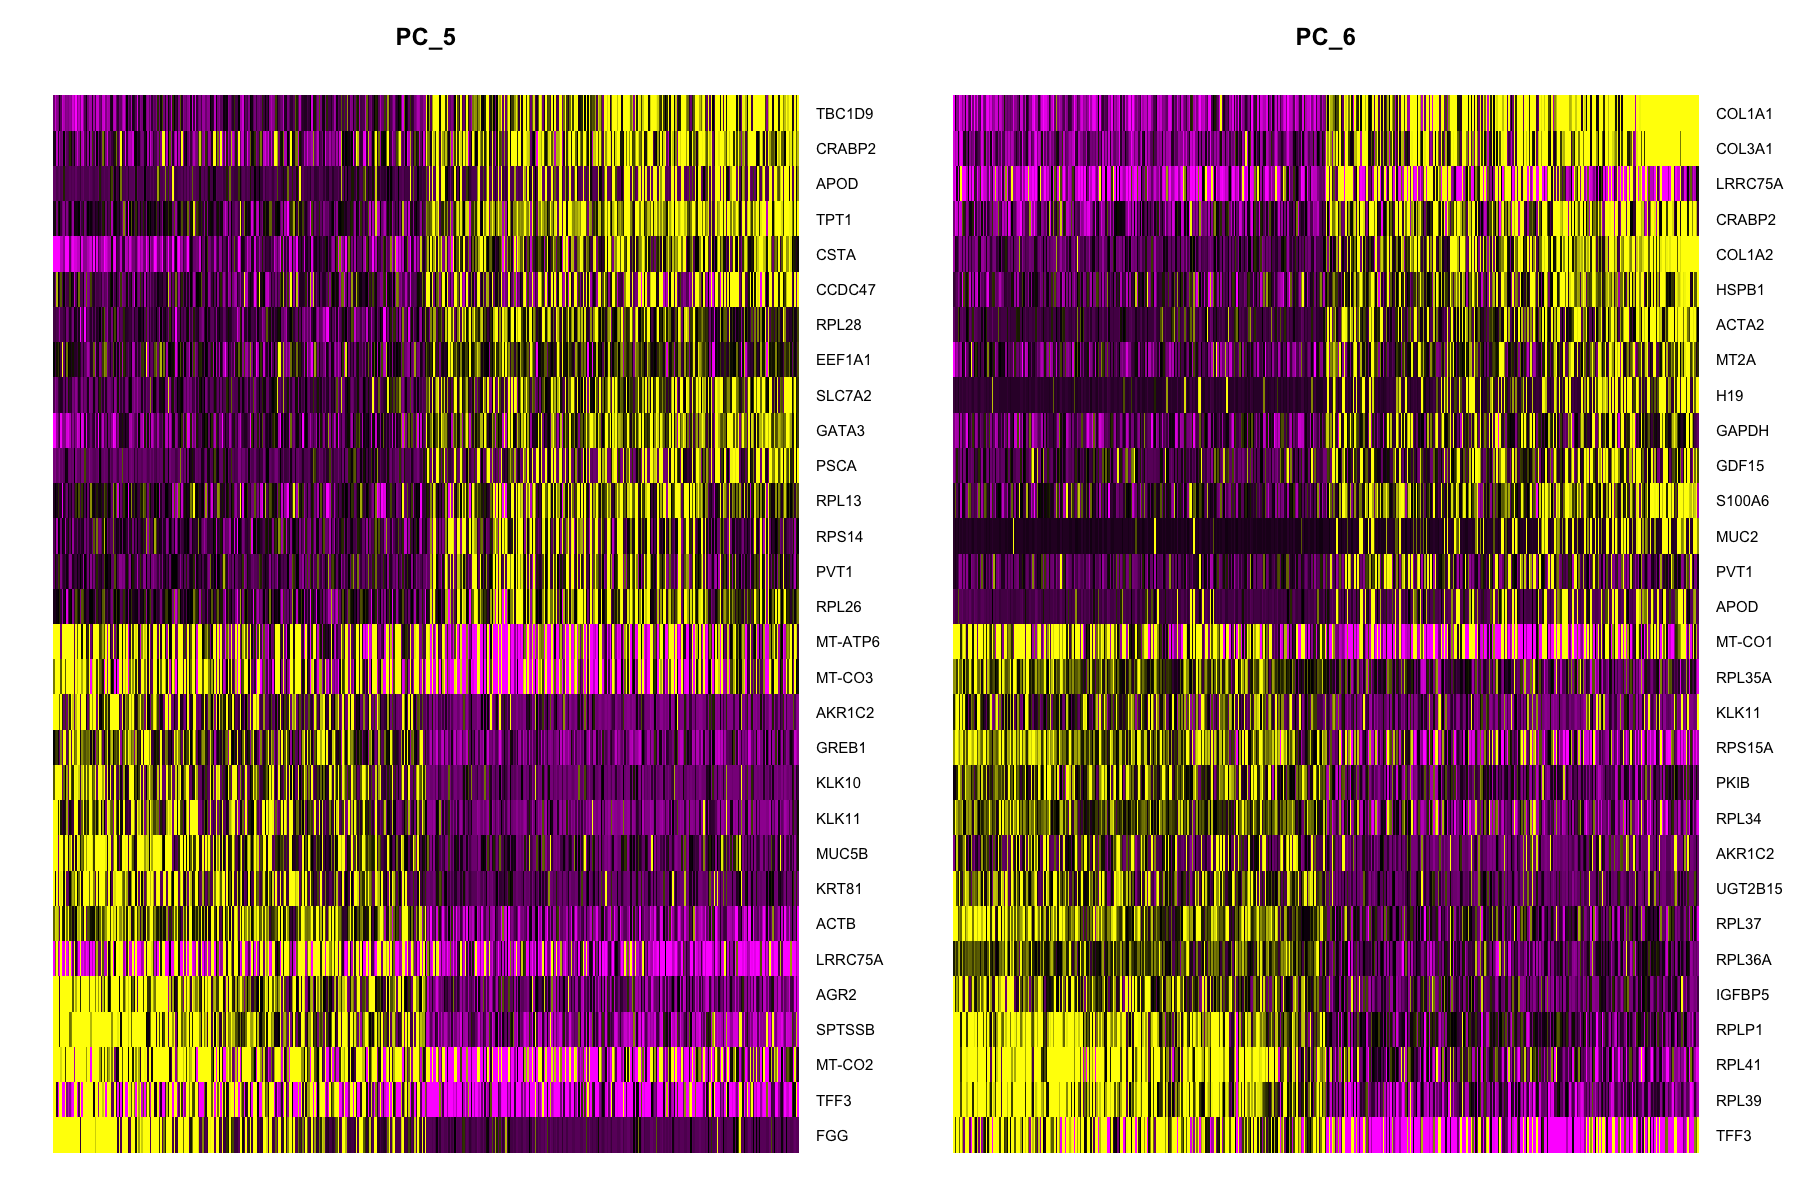

In [49]:
DimHeatmap(pbmc, dims = 5:6, cells = 500, balanced = TRUE)